<a href="https://colab.research.google.com/github/Dennieeeee/KPMG-Customer-Analytics-Project/blob/master/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/KPMG-Customer-Analytics-Project/master/Data/KPMG_new_data.csv')
new_customer = pd.read_csv('https://raw.githubusercontent.com/Dennieeeee/KPMG-Customer-Analytics-Project/master/Data/NewCustomerList.csv')

In [3]:
df.head()

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,customer_type,birth_year,age,month,weekday,transaction_year
0,177.0,82520 Mifflin Drive,2333,NSW,Australia,5.0,Ondrea,Pablos,Female,25,1989-11-09,Professor,Financial Services,High Net Worth,N,No,4.0,1206.0,49.0,2017-07-07,False,Approved,Solex,Standard,medium,large,1061.56,$733.58,34170.0,old,1989,31,July,Friday,2017
1,177.0,82520 Mifflin Drive,2333,NSW,Australia,5.0,Ondrea,Pablos,Female,25,1989-11-09,Professor,Financial Services,High Net Worth,N,No,4.0,1924.0,28.0,2017-05-18,True,Approved,Solex,Road,medium,small,1703.52,"$1,516.13",40649.0,old,1989,31,May,Thursday,2017
2,177.0,82520 Mifflin Drive,2333,NSW,Australia,5.0,Ondrea,Pablos,Female,25,1989-11-09,Professor,Financial Services,High Net Worth,N,No,4.0,4808.0,86.0,2017-10-15,True,Approved,Norco Bicycles,Road,high,large,774.53,$464.72,37698.0,old,1989,31,October,Sunday,2017
3,177.0,82520 Mifflin Drive,2333,NSW,Australia,5.0,Ondrea,Pablos,Female,25,1989-11-09,Professor,Financial Services,High Net Worth,N,No,4.0,6181.0,84.0,2017-02-07,False,Approved,Giant Bicycles,Road,medium,medium,792.90,$594.68,33879.0,old,1989,31,February,Tuesday,2017
4,177.0,82520 Mifflin Drive,2333,NSW,Australia,5.0,Ondrea,Pablos,Female,25,1989-11-09,Professor,Financial Services,High Net Worth,N,No,4.0,7495.0,92.0,2017-08-16,False,Approved,WeareA2B,Touring,medium,large,1890.39,$260.14,33259.0,old,1989,31,August,Wednesday,2017


In [4]:
df['standard_cost'] = df['standard_cost'].apply(lambda x: x.strip('$'))
#df['standard_cost'] = df['standard_cost'].astype(float)

In [5]:
df['past_3_years_bike_related_purchases'] = df['past_3_years_bike_related_purchases'].astype(float)

In [6]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12885 entries, 0 to 12884
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          12885 non-null  float64       
 1   address                              12885 non-null  object        
 2   postcode                             12885 non-null  int64         
 3   state                                12885 non-null  object        
 4   country                              12885 non-null  object        
 5   property_valuation                   12885 non-null  float64       
 6   first_name                           12885 non-null  object        
 7   last_name                            12885 non-null  object        
 8   gender                               12885 non-null  object        
 9   past_3_years_bike_related_purchases  12885 non-null  float64       
 10  DOB       

In [8]:
df['transaction_year'].value_counts()

2017    12885
Name: transaction_year, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Monthly Total Orders')

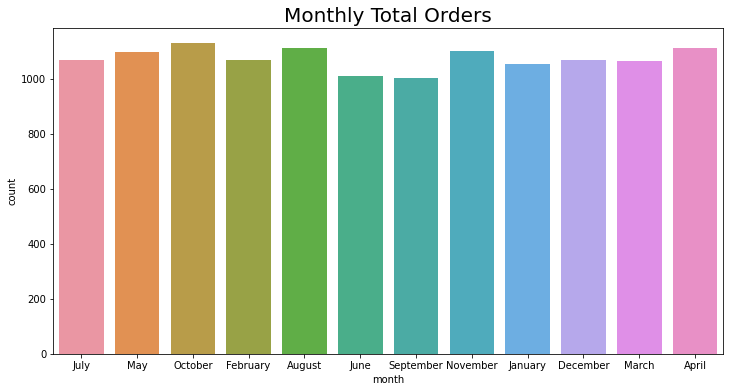

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(df['month'])
plt.title('Monthly Total Orders', size=20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Weekly Total Orders')

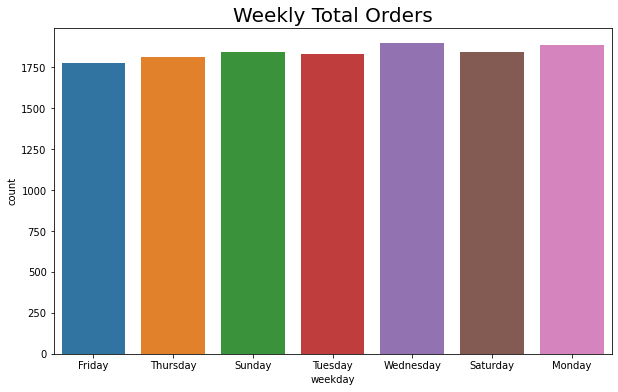

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(df['weekday'])
plt.title('Weekly Total Orders', size=20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Different Age Total Orders')

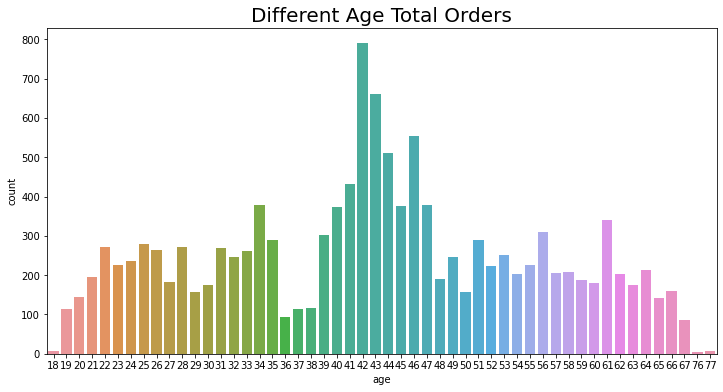

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(df['age'])
plt.title('Different Age Total Orders', size=20)

### Old Customer Age Group - 40 to 47
People in 40 to 47 reached a high order amount. Let's deep dive into this group of customers.

In [12]:
age_40s = df[(df['age'] >= 41) & (df['age'] < 48)]

In [13]:
print('Entrees duplicates: {}'.format(age_40s.duplicated().sum()))
age_40s.drop_duplicates(inplace = True)

Entrees duplicates: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
age_40s.shape

(3701, 35)

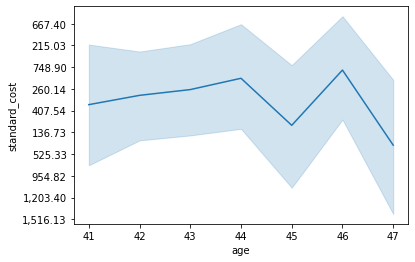

In [15]:
sns.lineplot(x='age', y='standard_cost', data=age_40s)

In [16]:
dow = {'weekday': {'Monday': 1,
                   "Tuesday": 2,
                   'Wednesday': 3,
                   'Thursday': 4,
                   'Friday': 5,
                   'Saturday':6,
                   'Sunday':7}}
age_40s.replace(dow, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


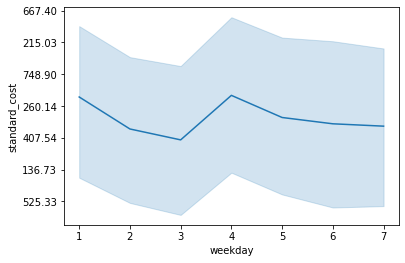

In [17]:
sns.lineplot(x = 'weekday', y='standard_cost', data=age_40s)

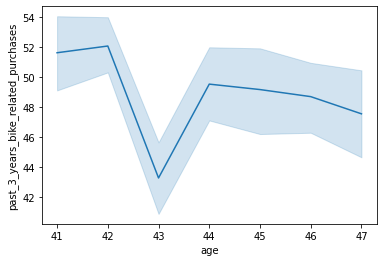

In [18]:
sns.lineplot(x='age', y='past_3_years_bike_related_purchases', data=age_40s)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Weekly Orders Female vs. Male')

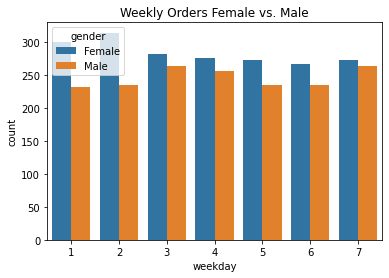

In [19]:
sns.countplot(age_40s['weekday'], hue=age_40s['gender'])
plt.title('Weekly Orders Female vs. Male')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Monthly Orders Female vs. Male')

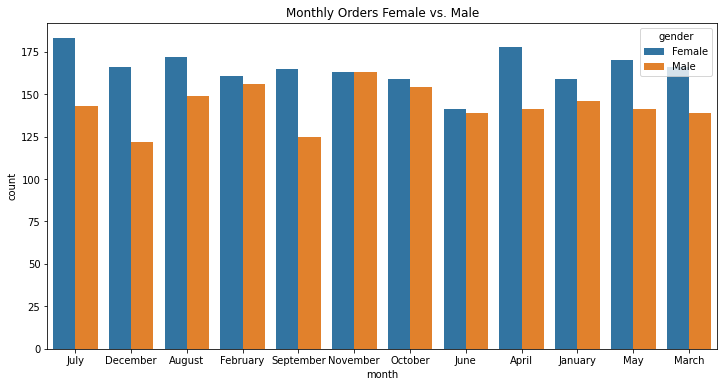

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(age_40s['month'], hue=age_40s['gender'])
plt.title('Monthly Orders Female vs. Male')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


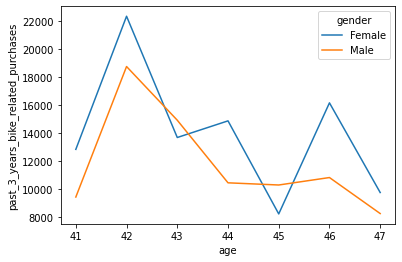

In [21]:
grouped = age_40s.groupby(by=['age','gender'],as_index=False)['past_3_years_bike_related_purchases'].sum()
sns.lineplot('age','past_3_years_bike_related_purchases',hue='gender',data=grouped)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


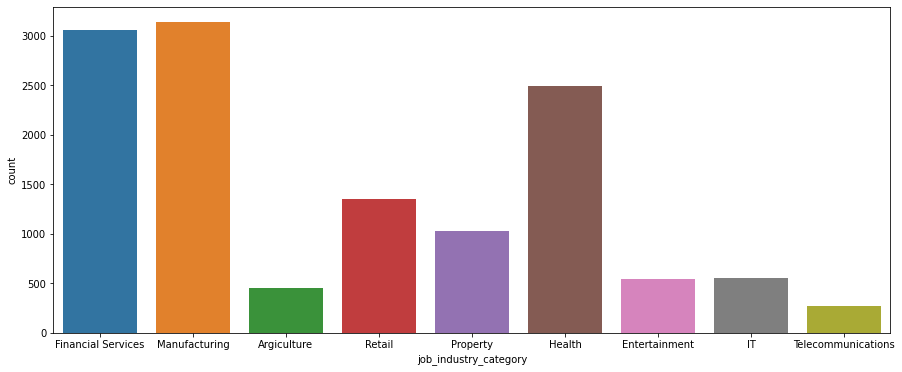

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(df['job_industry_category'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


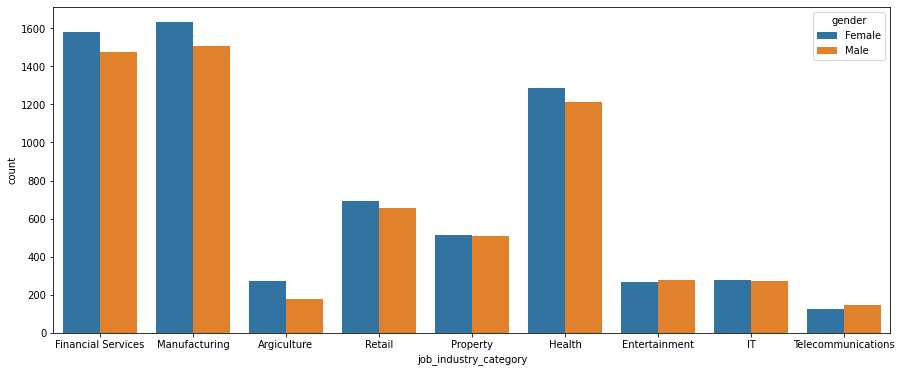

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(df['job_industry_category'], hue=df['gender'])

People in 40s and work in Financial Services, Manufacturing, and Health indusry.

In [24]:
top3_job_industry = age_40s[(age_40s['job_industry_category'] == 'Financial Services') |
                            (age_40s['job_industry_category'] == 'Manufacturing') |
                            (age_40s['job_industry_category'] == 'Health')]

In [25]:
top3_job_industry.head()

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,customer_type,birth_year,age,month,weekday,transaction_year
43,186.0,0059 Brentwood Road,4560,QLD,Australia,7.0,Mireielle,Jeppe,Female,46.0,1974-05-06,Software Test Engineer I,Financial Services,Mass Customer,N,No,3.0,4513.0,95.0,2017-07-18,False,Approved,Giant Bicycles,Standard,medium,large,569.56,528.43,37874.0,old,1974,46,July,2,2017
44,186.0,0059 Brentwood Road,4560,QLD,Australia,7.0,Mireielle,Jeppe,Female,46.0,1974-05-06,Software Test Engineer I,Financial Services,Mass Customer,N,No,3.0,8595.0,90.0,2017-12-07,True,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0,old,1974,46,December,4,2017
45,186.0,0059 Brentwood Road,4560,QLD,Australia,7.0,Mireielle,Jeppe,Female,46.0,1974-05-06,Software Test Engineer I,Financial Services,Mass Customer,N,No,3.0,10203.0,24.0,2017-08-07,True,Approved,Solex,Road,medium,large,1777.80,820.78,40670.0,old,1974,46,August,1,2017
46,186.0,0059 Brentwood Road,4560,QLD,Australia,7.0,Mireielle,Jeppe,Female,46.0,1974-05-06,Software Test Engineer I,Financial Services,Mass Customer,N,No,3.0,14302.0,11.0,2017-02-26,True,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,39298.0,old,1974,46,February,7,2017
47,186.0,0059 Brentwood Road,4560,QLD,Australia,7.0,Mireielle,Jeppe,Female,46.0,1974-05-06,Software Test Engineer I,Financial Services,Mass Customer,N,No,3.0,14395.0,11.0,2017-09-03,False,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,39298.0,old,1974,46,September,7,2017


## Time Series Analysis

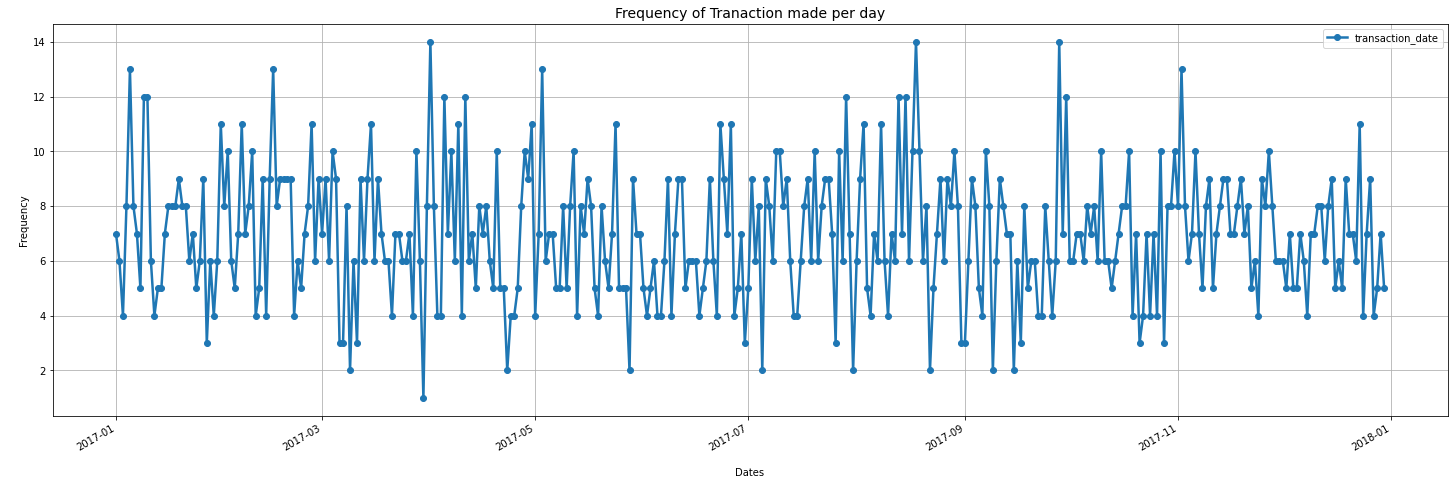

In [26]:
top3_job_industry['transaction_date'].value_counts().plot(kind='line',linewidth=2.5,linestyle='-',marker='o',figsize=(25, 8))
plt.xlabel('\nDates')
plt.ylabel('\nFrequency')
plt.title('Frequency of Tranaction made per day',fontdict = {'fontsize' : 14})
plt.legend()
plt.grid(True)
plt.show()

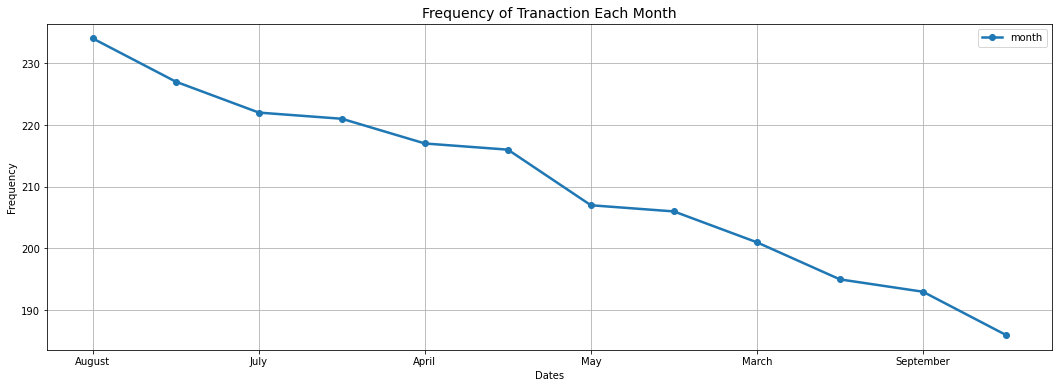

In [27]:
top3_job_industry['month'].value_counts().plot(kind='line',linewidth=2.5,linestyle='-',marker='o',figsize=(18, 6))
plt.xlabel('Dates')
plt.ylabel('Frequency')
plt.title('Frequency of Tranaction Each Month',fontdict = {'fontsize' : 14})
plt.legend()
plt.grid(True)
plt.show()

<strong>What's the average list price daily?</strong>

In [29]:
date_count = top3_job_industry.groupby(by='transaction_date').mean()
average_list_price = date_count['list_price'].mean()
points = len(date_count.index)

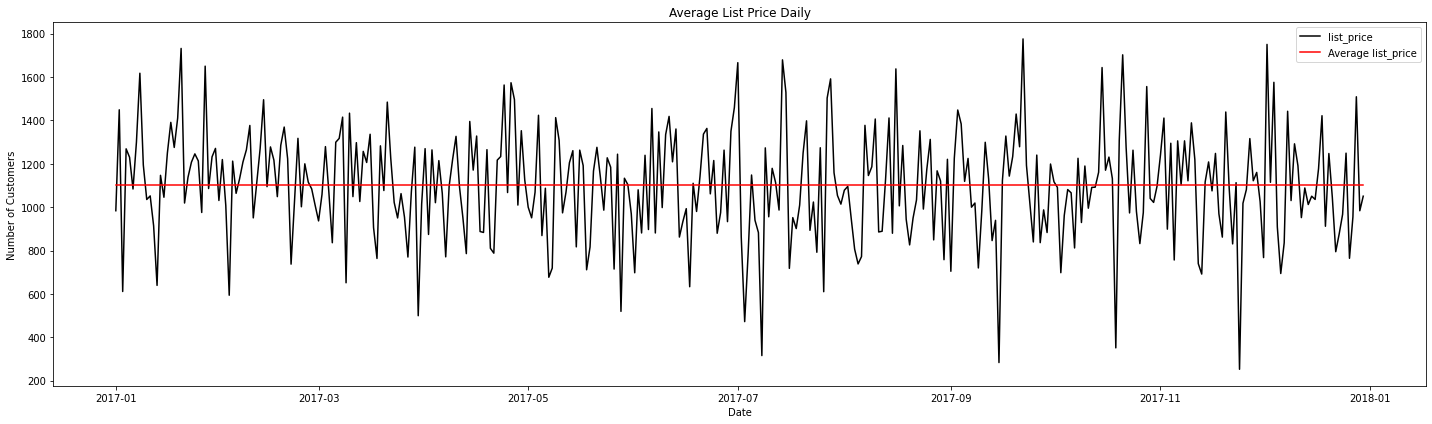

In [34]:
plt.figure(figsize=(20,6))
plt.plot(date_count.index, date_count['list_price'], c='black', label = 'list_price')
plt.plot(date_count.index, np.linspace(average_list_price,average_list_price,points), c='r', label = 'Average list_price')
plt.title('Average List Price Daily')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.tight_layout()

<strong>What's the average past_3_years_bike_related_purchases daily? </strong>

In [35]:
date_count = top3_job_industry.groupby(by='transaction_date').mean()
average_past3 = date_count['past_3_years_bike_related_purchases'].mean()
points = len(date_count.index)

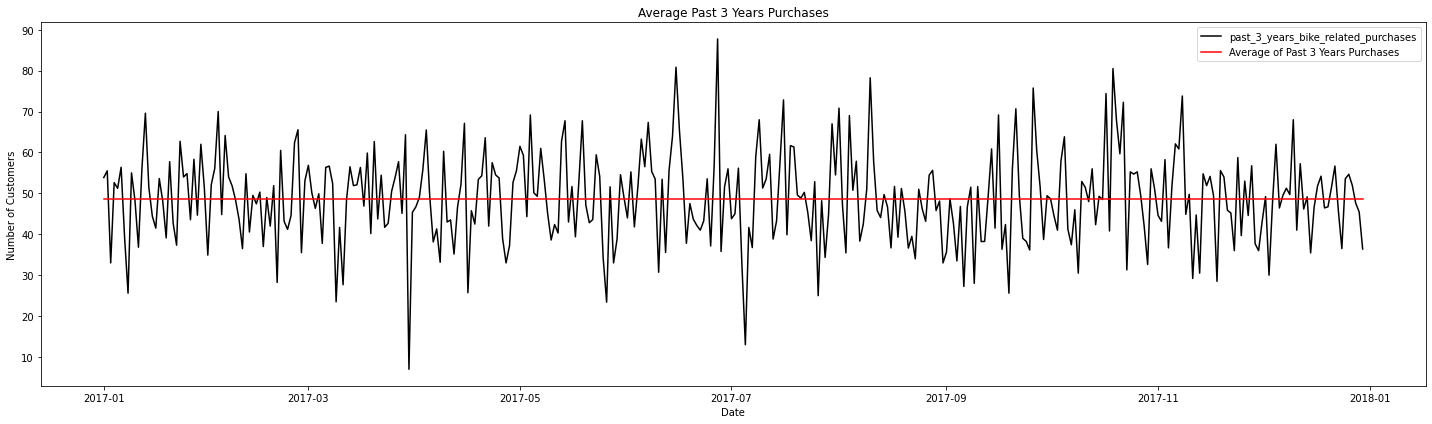

In [38]:
plt.figure(figsize=(20,6))
plt.plot(date_count.index, date_count['past_3_years_bike_related_purchases'], c='black', label = 'past_3_years_bike_related_purchases')
plt.plot(date_count.index, np.linspace(average_past3,average_past3,points), c='r', label = 'Average of Past 3 Years Purchases')
plt.title('Average Past 3 Years Purchases')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.tight_layout()